## F1 2024 exemplar trial using 8 states

In [1]:
from bbvi_infer_2l import * 
from f1 import *
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Read in data observations

In [2]:
year= 2024
gp = 'China'
event = 'Race'

session_event = ff1.get_session(year, gp, event)
session_event.load()
circuit_info = session_event.get_circuit_info()

req         WARNING 	DEFAULT CACHE ENABLED! (396.53 MB) /root/.cache/fastf1
core           INFO 	Loading data for Chinese Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 00:08.313000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 d

In [3]:
# Full racetrack 
pos_winner= generate_full_laps(session_event.laps.pick_driver('VER'), 'VER')

/opt/conda/lib/python3.10/site-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


In [4]:
## States 
states_train, zs_train = one_hot_states_multilap(pos_winner[['X','Y']].to_numpy(), circuit_info.corners[['X','Y']].to_numpy(), 
                                    pos_winner['LapNumber'].to_numpy())

In [5]:
## Standardize exemplar trial
import numpy.random as npr
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
track_norm = scaler.fit_transform(pos_winner[['X','Y']].to_numpy())
C = npr.randn(10, 2)  ## emission matrix
ys_train = (C @ track_norm.T).T + npr.randn(track_norm.shape[0], 10)*0.01

In [6]:
K=8 ## state
D=2 ## latent dimension
T=len(ys_train) ## timesteps

## GSD
### GSD Train  

  0%|          | 0/4000 [00:00<?, ?it/s]

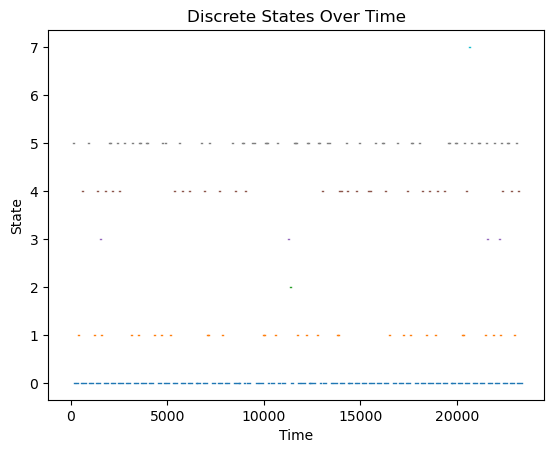

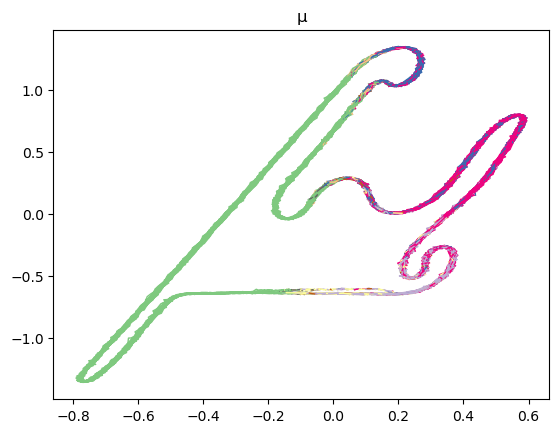

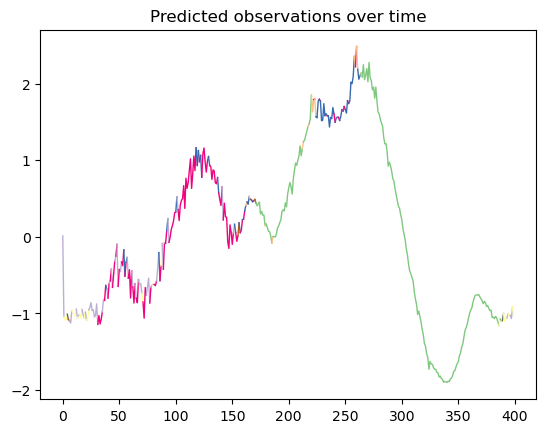

ELBO: -917865.6, LR: 0.01000, Tau: 0.990:   0%|          | 5/4000 [00:14<2:25:22,  2.18s/it]  

R2: [-0.99421656]


ELBO: 6602.2, LR: 0.01000, Tau: 0.990:   5%|▍         | 199/4000 [00:18<01:23, 45.36it/s]   /opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:240: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)
ELBO: 8154.1, LR: 0.01000, Tau: 0.990:   5%|▍         | 199/4000 [00:18<01:23, 45.36it/s]

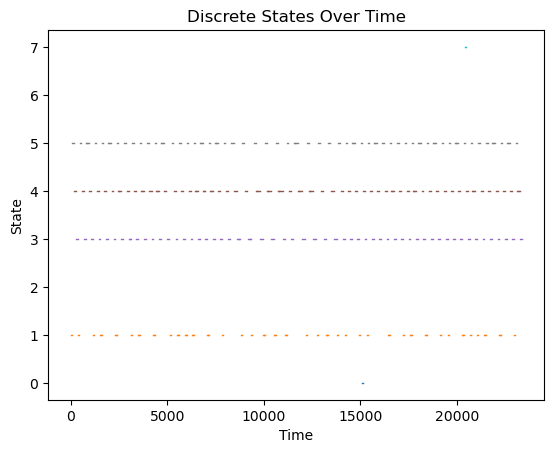

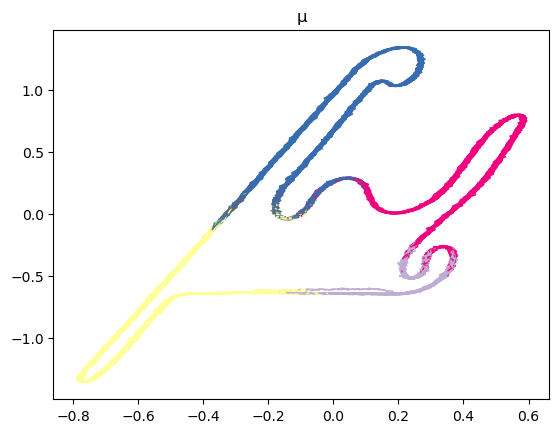

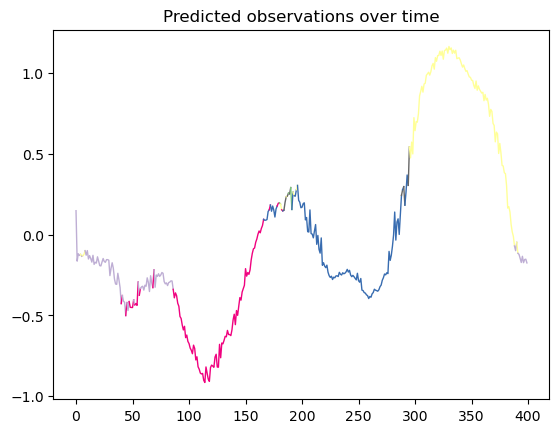

ELBO: 18953.2, LR: 0.00984, Tau: 0.990:   5%|▌         | 204/4000 [00:25<23:54,  2.65it/s]

R2: [0.9894471]


ELBO: 232918.2, LR: 0.00550, Tau: 0.990:  10%|▉         | 397/4000 [00:29<01:19, 45.07it/s]

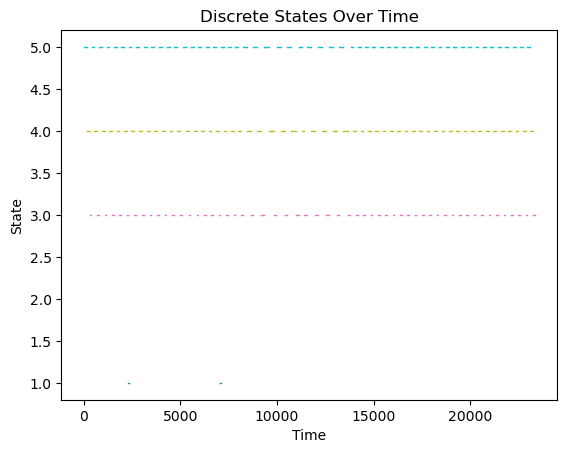

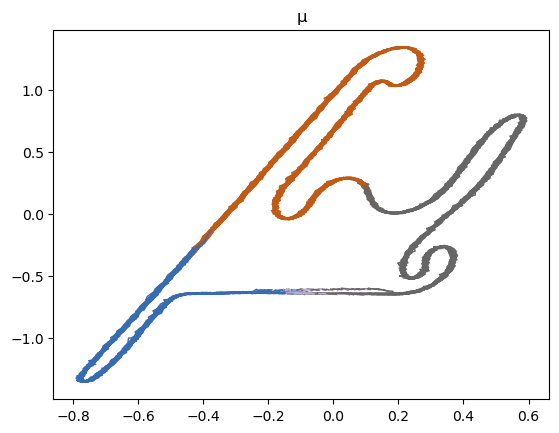

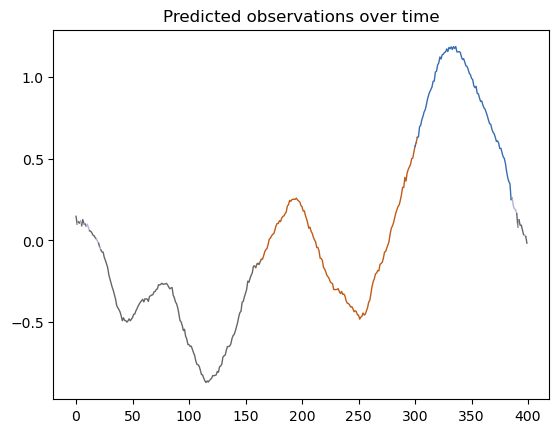

ELBO: 237306.7, LR: 0.00537, Tau: 0.990:  10%|█         | 406/4000 [00:31<06:42,  8.93it/s]

R2: [0.99826986]


ELBO: 314025.5, LR: 0.00100, Tau: 0.990:  15%|█▍        | 596/4000 [00:35<01:15, 45.27it/s]

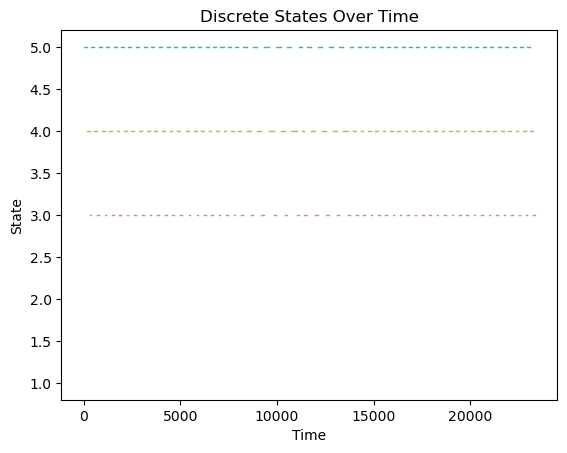

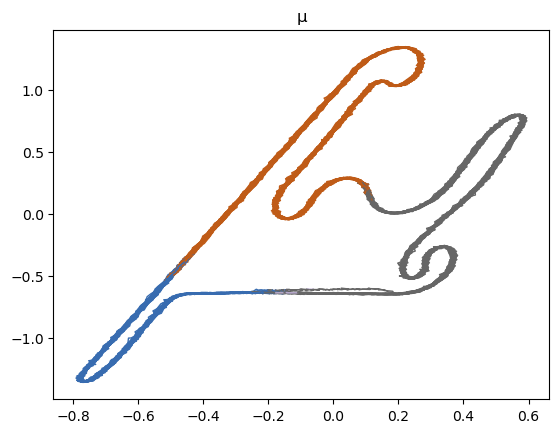

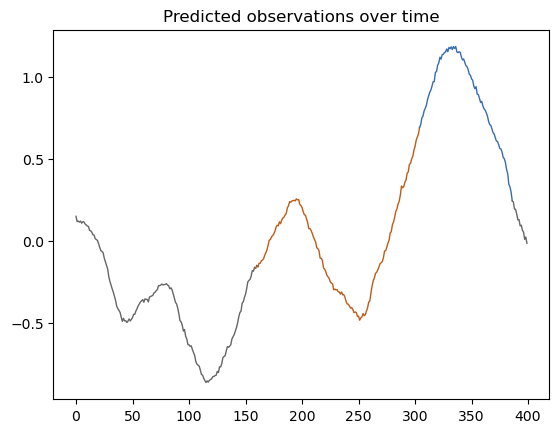

ELBO: 315076.6, LR: 0.00100, Tau: 0.990:  15%|█▌        | 606/4000 [00:37<04:20, 13.05it/s]

R2: [0.998751]


ELBO: 335813.1, LR: 0.00100, Tau: 0.990:  20%|█▉        | 796/4000 [00:41<01:11, 44.95it/s]

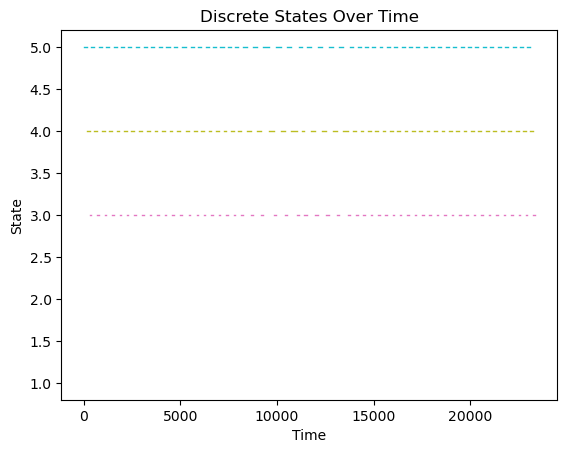

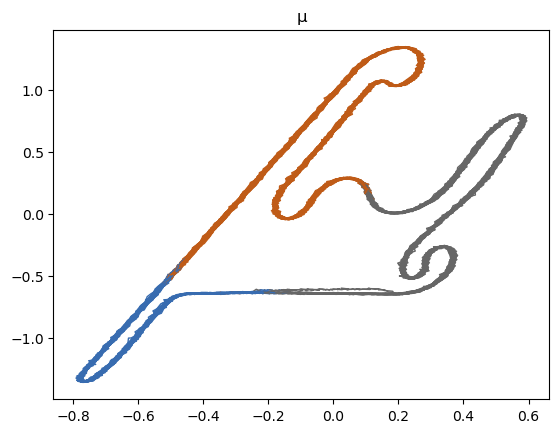

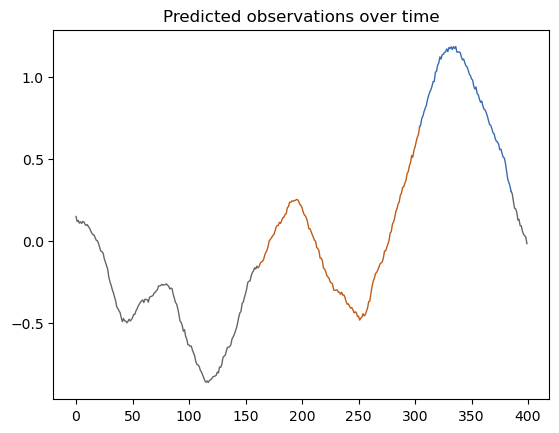

ELBO: 336572.3, LR: 0.00100, Tau: 0.990:  20%|██        | 806/4000 [00:42<03:51, 13.81it/s]

R2: [0.99880564]


ELBO: 355747.7, LR: 0.00100, Tau: 0.990:  25%|██▍       | 996/4000 [00:47<01:06, 44.85it/s]

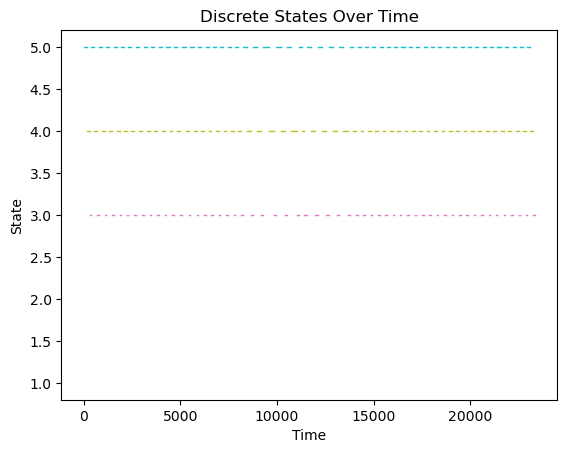

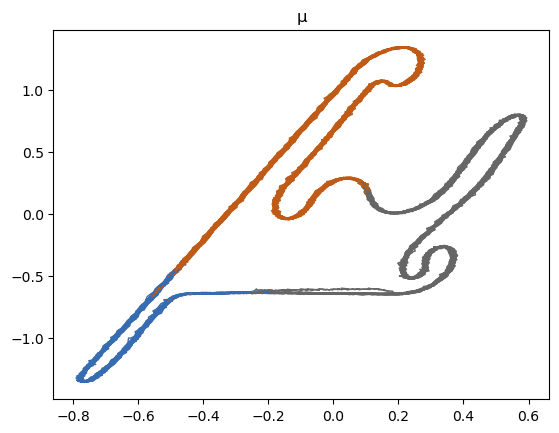

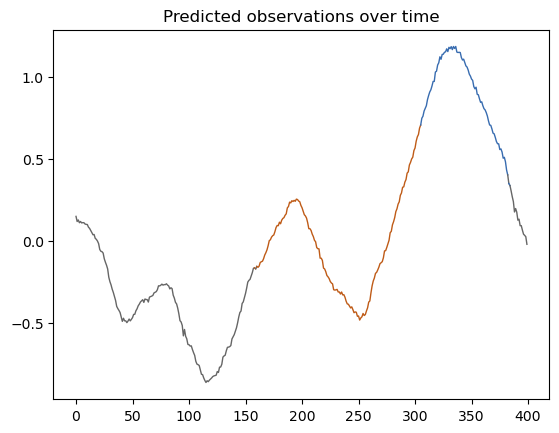

ELBO: 356583.9, LR: 0.00100, Tau: 0.990:  25%|██▌       | 1006/4000 [00:48<03:45, 13.28it/s]

R2: [0.99883825]


ELBO: 374160.9, LR: 0.00100, Tau: 0.990:  30%|██▉       | 1196/4000 [00:52<01:02, 45.17it/s]

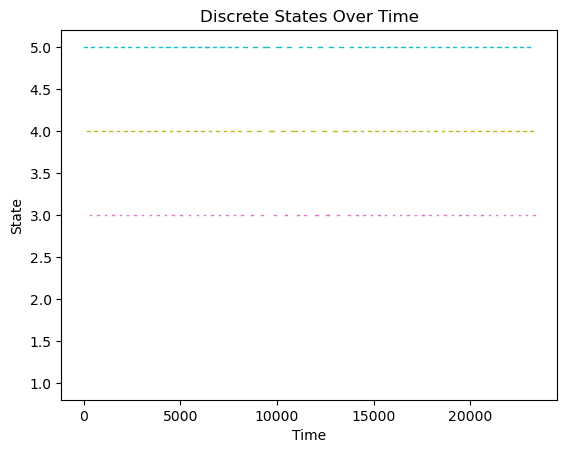

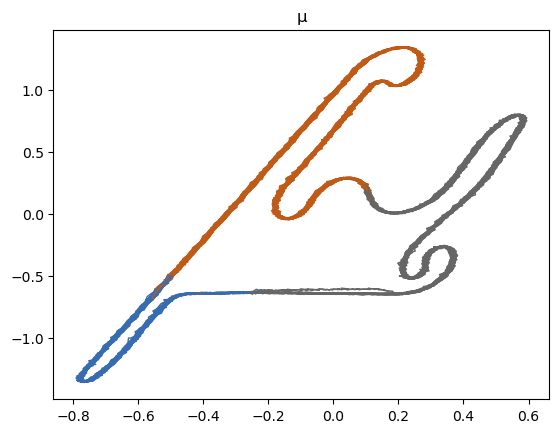

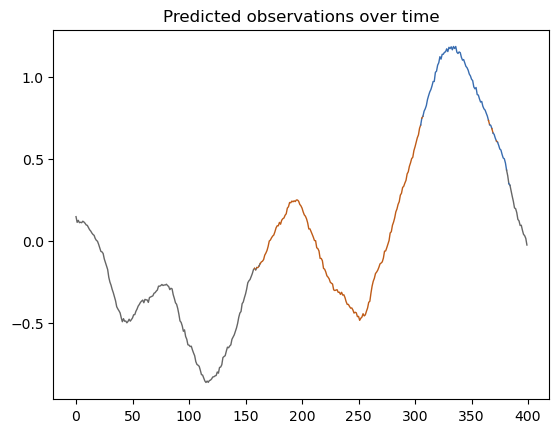

ELBO: 374975.6, LR: 0.00100, Tau: 0.990:  30%|███       | 1206/4000 [00:54<03:47, 12.28it/s]

R2: [0.99885625]


ELBO: 390952.9, LR: 0.00100, Tau: 0.990:  35%|███▍      | 1396/4000 [00:58<00:57, 44.91it/s]

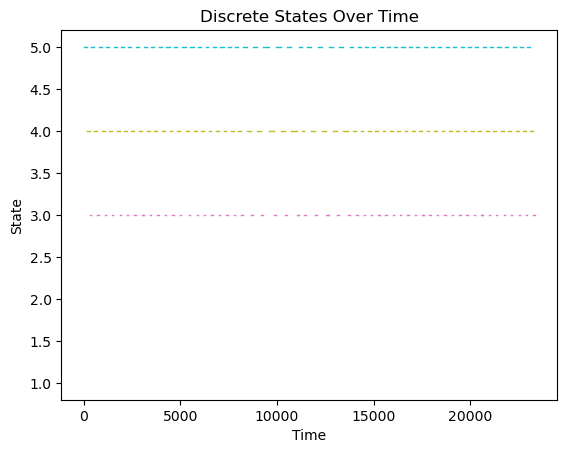

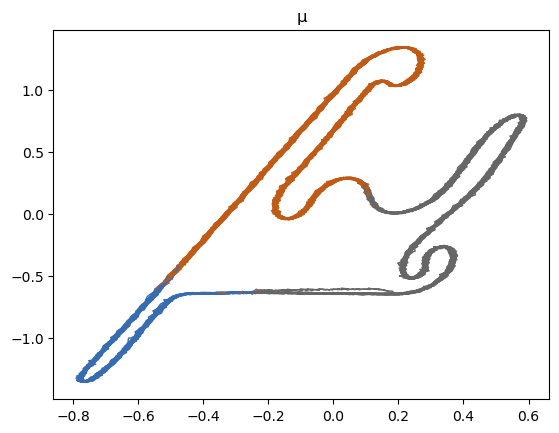

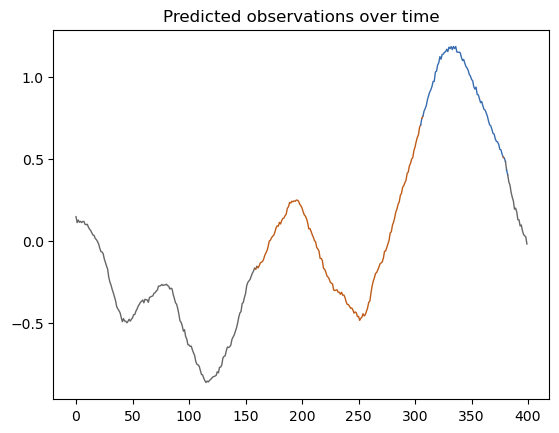

ELBO: 391752.4, LR: 0.00100, Tau: 0.990:  35%|███▌      | 1406/4000 [01:00<03:24, 12.68it/s]

R2: [0.9988697]


ELBO: 406405.6, LR: 0.00100, Tau: 0.990:  40%|███▉      | 1596/4000 [01:04<00:53, 44.90it/s]

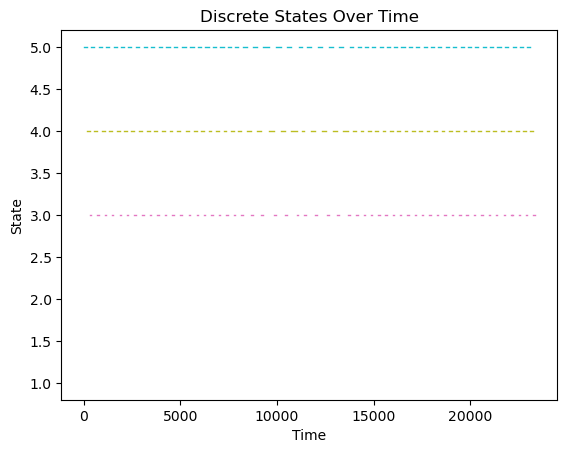

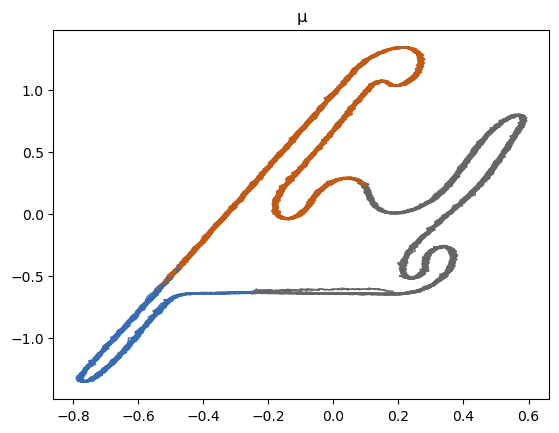

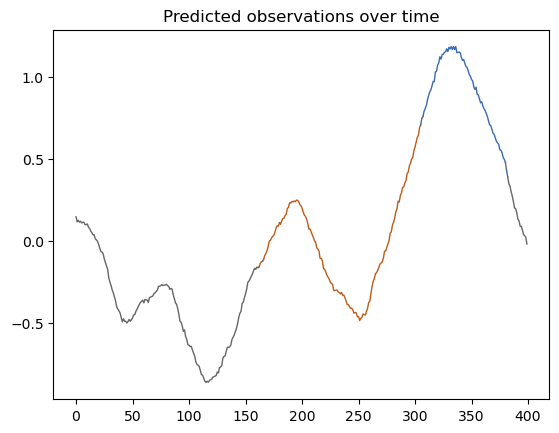

ELBO: 407193.1, LR: 0.00100, Tau: 0.990:  40%|████      | 1606/4000 [01:05<03:00, 13.26it/s]

R2: [0.99888146]


ELBO: 420336.9, LR: 0.00100, Tau: 0.990:  45%|████▍     | 1796/4000 [01:10<00:48, 45.01it/s]

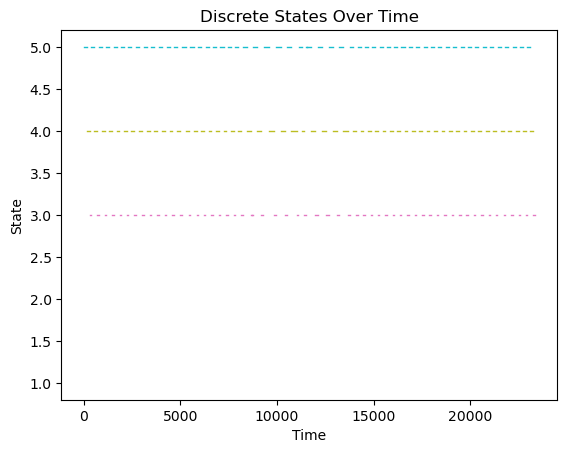

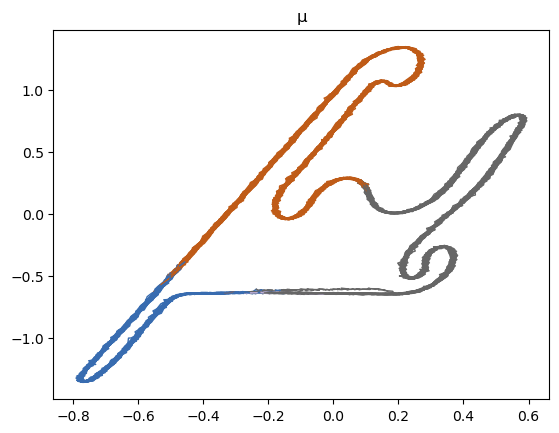

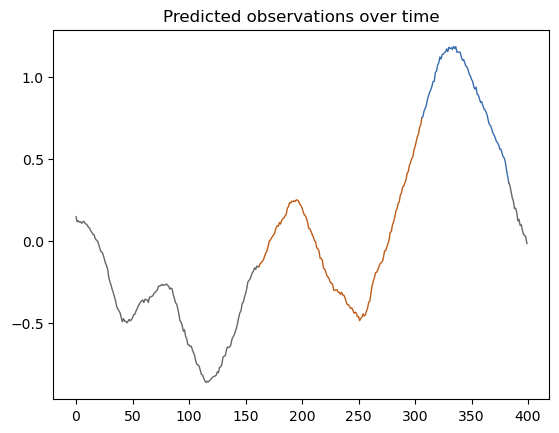

ELBO: 420831.7, LR: 0.00100, Tau: 0.990:  45%|████▌     | 1806/4000 [01:11<02:49, 12.95it/s]

R2: [0.998903]


ELBO: 433663.8, LR: 0.00100, Tau: 0.990:  50%|████▉     | 1996/4000 [01:15<00:44, 45.06it/s]

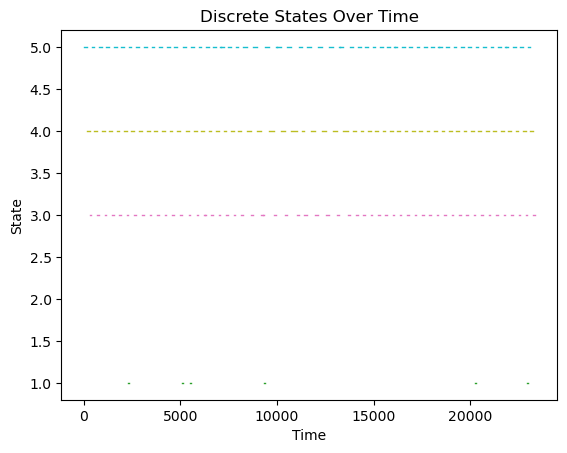

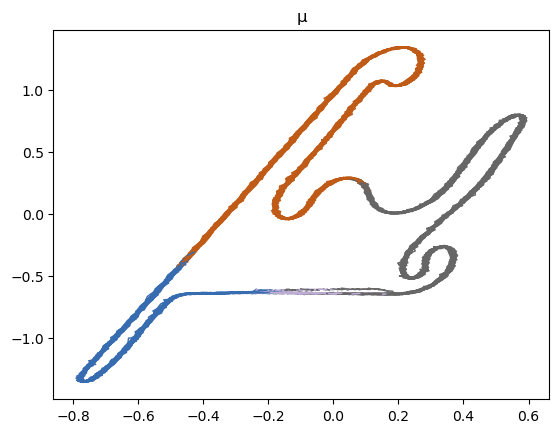

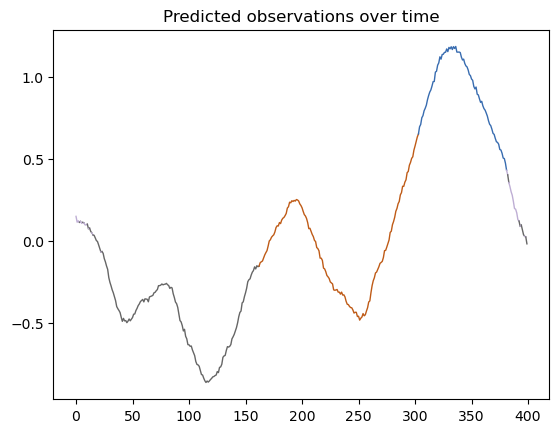

ELBO: 434105.3, LR: 0.00100, Tau: 0.990:  50%|█████     | 2005/4000 [01:18<03:37,  9.17it/s]

R2: [0.9989435]


ELBO: 445519.3, LR: 0.00100, Tau: 0.990:  55%|█████▍    | 2199/4000 [01:22<00:40, 44.97it/s]

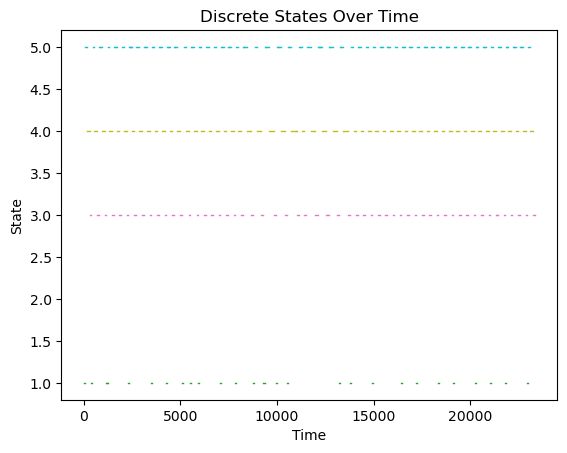

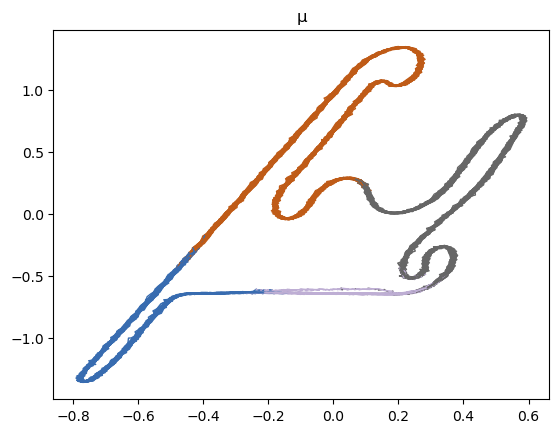

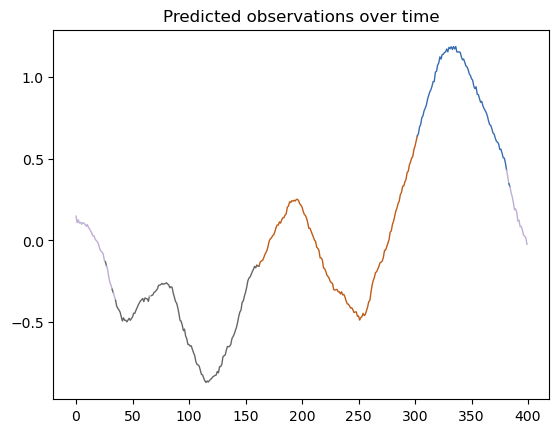

ELBO: 445875.7, LR: 0.00100, Tau: 0.990:  55%|█████▌    | 2204/4000 [01:24<04:19,  6.93it/s]

R2: [0.99897164]


ELBO: 455002.8, LR: 0.00100, Tau: 0.990:  60%|█████▉    | 2398/4000 [01:28<00:35, 45.00it/s]

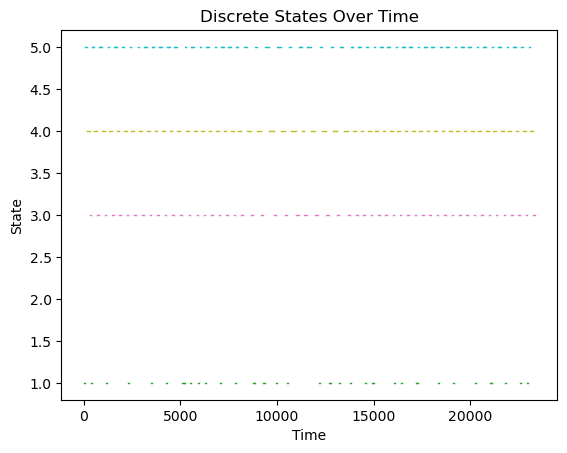

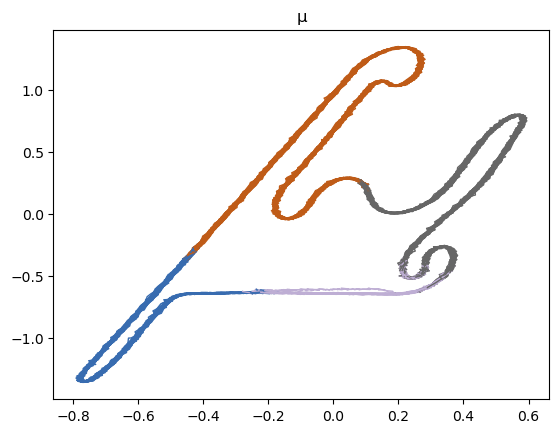

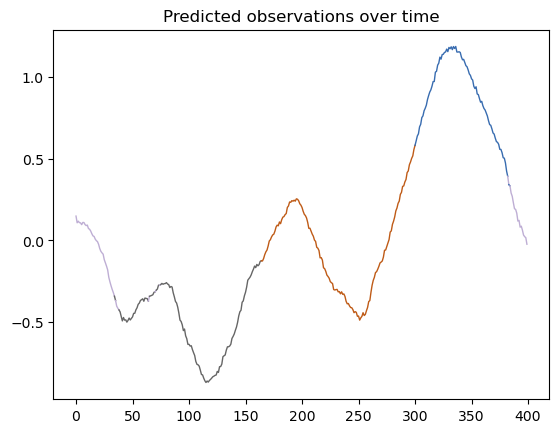

ELBO: 455196.4, LR: 0.00100, Tau: 0.990:  60%|██████    | 2403/4000 [01:31<04:38,  5.74it/s]

R2: [0.9989804]


ELBO: 462381.1, LR: 0.00100, Tau: 0.990:  65%|██████▍   | 2597/4000 [01:35<00:31, 45.08it/s]

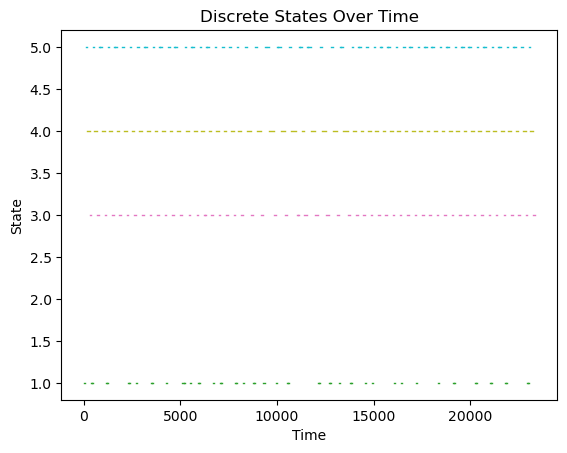

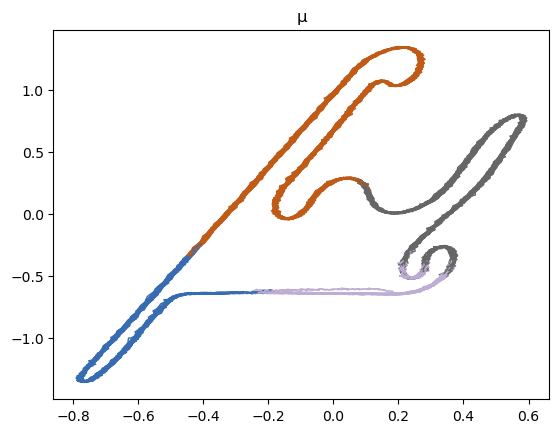

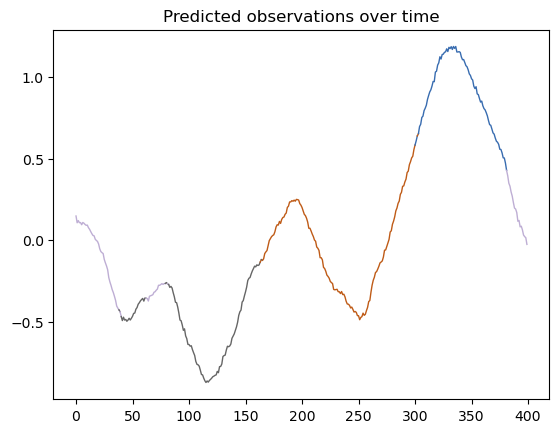

ELBO: 462354.7, LR: 0.00100, Tau: 0.990:  65%|██████▌   | 2606/4000 [01:38<03:11,  7.27it/s]

R2: [0.9989856]


ELBO: 467657.5, LR: 0.00100, Tau: 0.990:  70%|███████   | 2800/4000 [01:42<00:26, 44.89it/s]

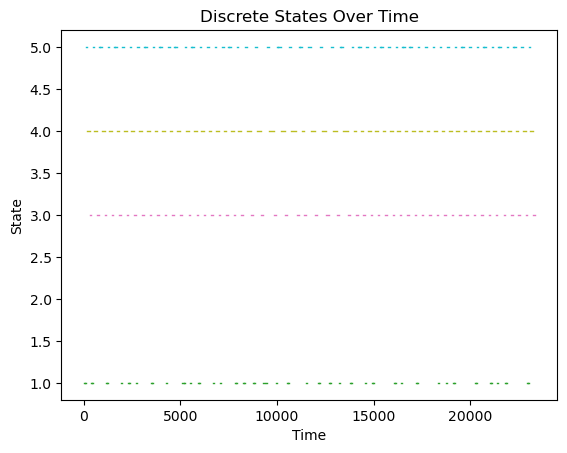

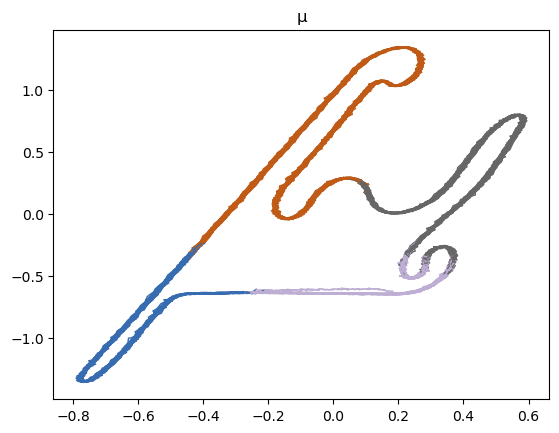

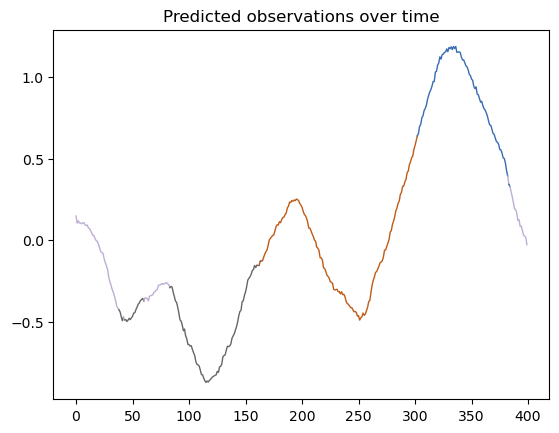

ELBO: 467784.9, LR: 0.00100, Tau: 0.990:  70%|███████   | 2805/4000 [01:45<03:18,  6.03it/s]

R2: [0.99899113]


ELBO: 471377.1, LR: 0.00100, Tau: 0.990:  75%|███████▍  | 2999/4000 [01:49<00:22, 44.81it/s]

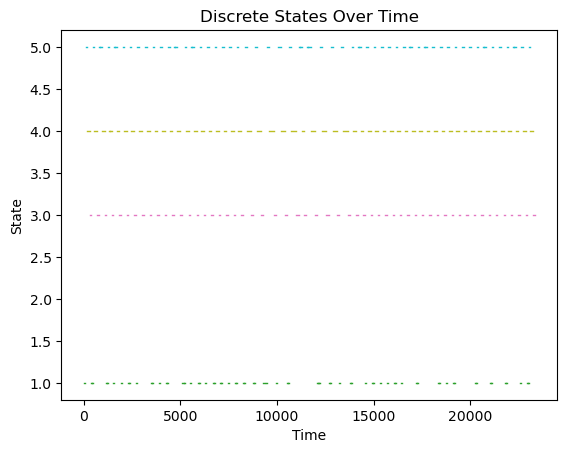

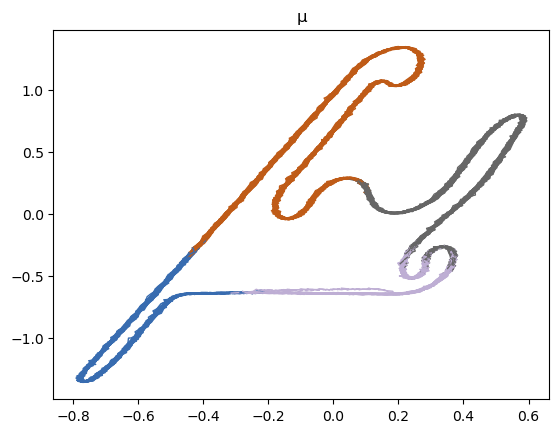

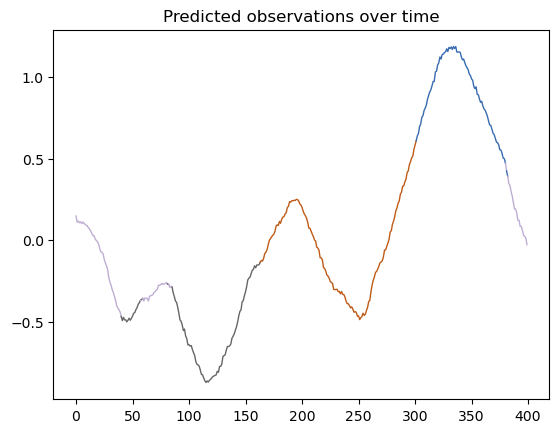

ELBO: 471653.2, LR: 0.00100, Tau: 0.990:  75%|███████▌  | 3004/4000 [01:52<02:45,  6.02it/s]

R2: [0.99899596]


ELBO: 473759.8, LR: 0.00100, Tau: 0.990:  80%|███████▉  | 3198/4000 [01:56<00:17, 44.88it/s]

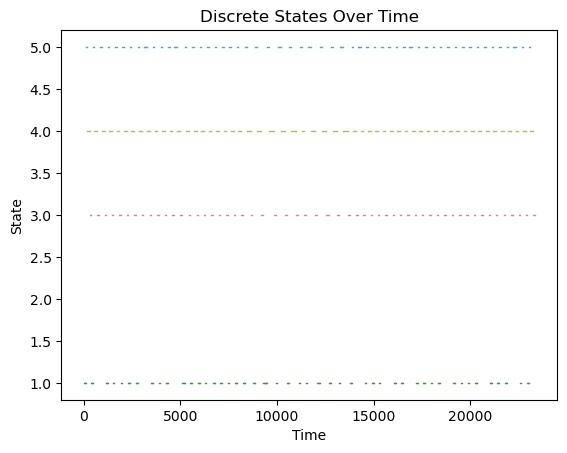

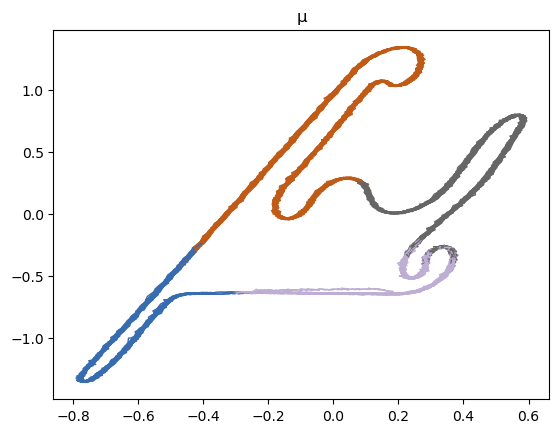

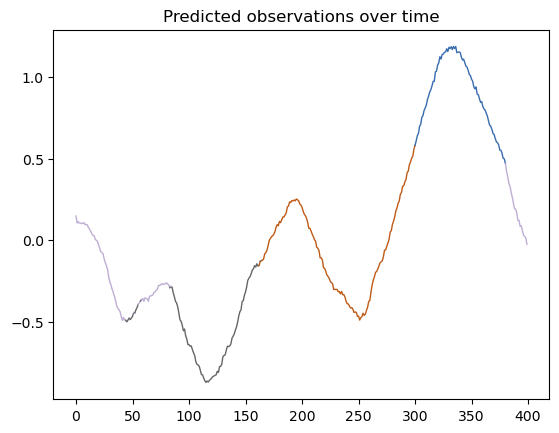

ELBO: 473904.5, LR: 0.00100, Tau: 0.990:  80%|████████  | 3203/4000 [01:59<02:01,  6.54it/s]

R2: [0.9989999]


ELBO: 474934.2, LR: 0.00100, Tau: 0.990:  85%|████████▍ | 3397/4000 [02:03<00:13, 44.74it/s]

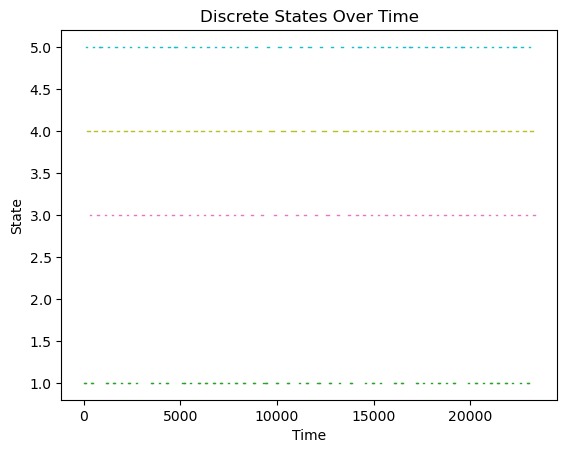

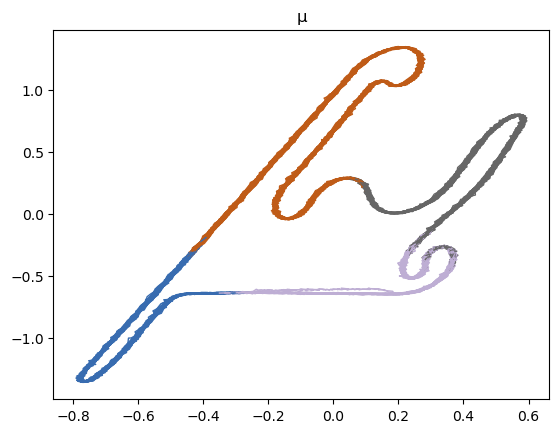

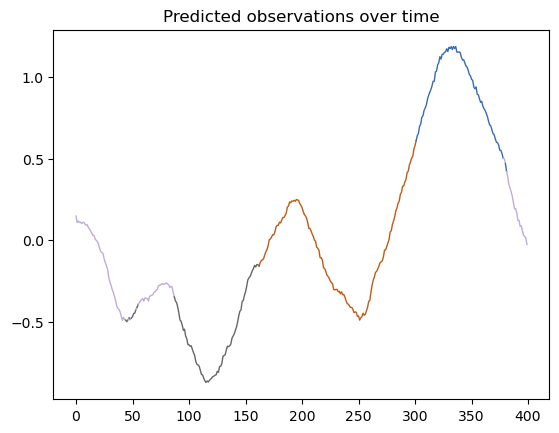

ELBO: 474945.0, LR: 0.00100, Tau: 0.990:  85%|████████▌ | 3406/4000 [02:05<01:16,  7.77it/s]

R2: [0.9990033]


ELBO: 475676.6, LR: 0.00100, Tau: 0.990:  90%|████████▉ | 3596/4000 [02:10<00:09, 44.77it/s]

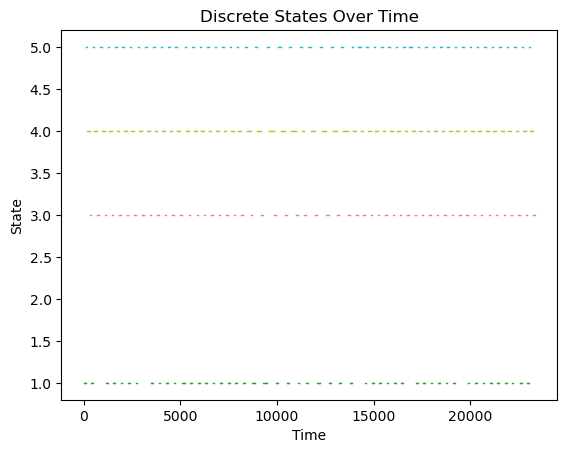

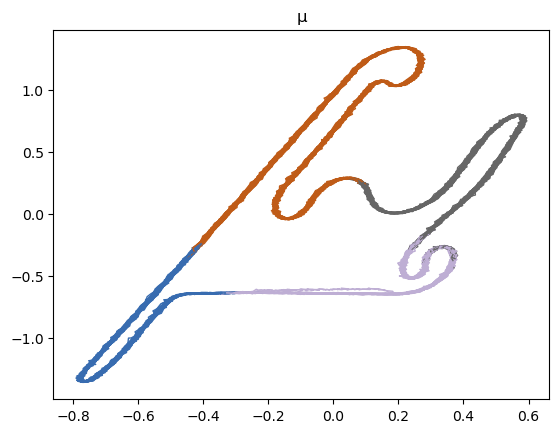

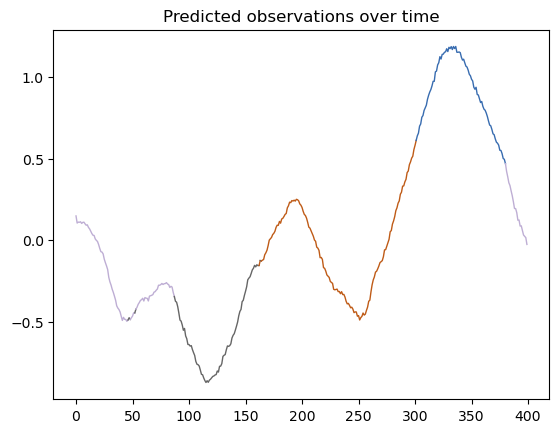

ELBO: 475867.4, LR: 0.00100, Tau: 0.990:  90%|█████████ | 3605/4000 [02:12<00:49,  7.94it/s]

R2: [0.99900657]


ELBO: 475639.7, LR: 0.00100, Tau: 0.990:  91%|█████████ | 3642/4000 [02:13<00:13, 27.27it/s]

Early stopping at iteration 3642.


In [7]:
torch.manual_seed(2)  # Pick best seed!
torch.cuda.manual_seed_all(2)  # Set CUDA seed 
model = GenerativeSLDS(N=10, K=K, D=D, emission_model="gaussian")
elbos, variational_z = fit_bbvi_schedule(model.to('cuda'), ys = torch.tensor(ys_train).to('cuda').float(), 
                                         num_iters=4000, learning=True, n_samples=10, base_lr=1e-2, 
                                         warmup_iters=200, tau_max=0.99, verbose=True)

Text(0, 0.5, 'ELBO')

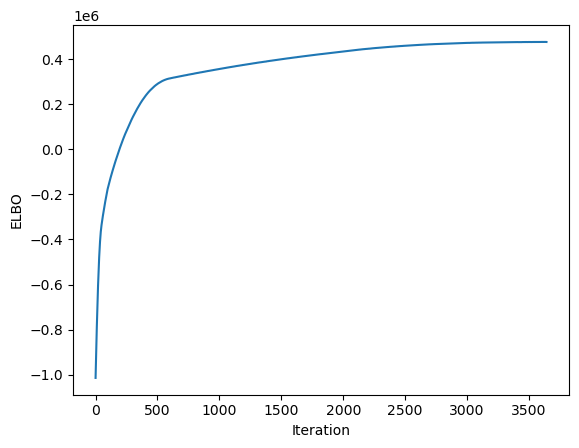

In [8]:
plt.figure()
plt.plot(elbos[1:])
plt.xlabel("Iteration")
plt.ylabel("ELBO")

In [ ]:
zs = variational_z.sample_q_z(torch.tensor(ys_train).to('cuda').float().unsqueeze(0).expand(20, -1, -1), 0.99)  ## inferred z2,..z_T
pred_ys0=model.smooth(torch.tensor(ys_train).to('cuda').float(), zs).mean(dim=0).detach().cpu().numpy() # [T, N]
plot_gs_states(zs.mean(dim=0).detach().cpu().numpy())

In [10]:
y_preds, z_preds = predict_k_step_more(k_max=10, model=model, variational_z=variational_z, ys=ys_train)
print("Train accuracy:", train_metrics(ys_train, pred_ys0, y_preds, k_max=10))

Train accuracy: [0.9990099835660242, 0.9989971803678326, 0.9975055312209247, 0.9951464045910576, 0.9919499379803373, 0.9879580456184198, 0.9832217366757684, 0.9777928754029673, 0.9717144974453467, 0.965033139858291, 0.9578032056931036]


### GSD Test

In [13]:
pos_alt= generate_full_laps(session_event.laps.pick_driver('SAI'), 'SAI')

/opt/conda/lib/python3.10/site-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


In [14]:
### States
states_test, zs_test = one_hot_states_multilap(pos_alt[['X','Y']].to_numpy(), circuit_info.corners[['X','Y']].to_numpy(), 
                                               pos_alt['LapNumber'].to_numpy())

In [15]:
### Observations
track_norm = scaler.transform(pos_alt[['X','Y']].to_numpy())
ys_test = (C @ track_norm.T).T + npr.randn(track_norm.shape[0], 10)*0.01

In [16]:
zs2 = variational_z.sample_q_z(torch.tensor(ys_test).to('cuda').float().unsqueeze(0).expand(20, -1, -1), 0.99)  ## inferred z2,..z_T
pred_ys2=model.smooth(torch.tensor(ys_test).to('cuda').float(), zs2).mean(dim=0).detach().cpu().numpy() # [T, N]
print("Test accuracy:", train_metrics(ys_test, pred_ys2, None, k_max=0))

Test accuracy: [0.9990242496364422]


In [17]:
### State quality
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
Z_train = torch.mean(zs, dim=0).detach().cpu().numpy()
Y_train = np.array(zs_train)
Z_test = torch.mean(zs2, dim=0).detach().cpu().numpy()
Y_test = np.array(zs_test)
# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
knn.fit(Z_train, Y_train)
acc = knn.score(Z_test, Y_test)
print("Test accuracy:", acc)

Test accuracy: 0.7346478153479261


### Interpretability

In [11]:
def plot_trajectory(z, x, ls="-", title=''):
    n_states = z.max() + 1
    cmap_obj = plt.get_cmap("tab20", n_states)   
    zcps = np.concatenate(([0], np.where(np.diff(z))[0] + 1, [z.size]))
    for start, stop in zip(zcps[:-1], zcps[1:]):
        plt.plot(x[start:stop + 1, 0],
                x[start:stop + 1, 1],
                lw=1, ls=ls,
                color=cmap_obj.colors[z[start]],
                alpha=1.0)
    # Add labels and legend
    plt.title(title)
    plt.show()

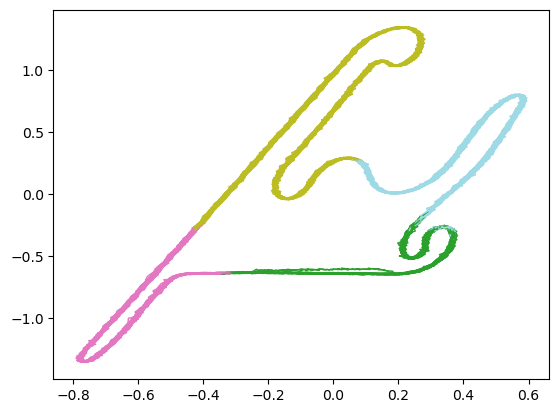

In [12]:
plot_trajectory(torch.argmax(torch.mean(zs, dim=0), dim=1).cpu().numpy(),
                torch.einsum('tn,dn->td', torch.tensor(ys_train).to('cuda').float(), model.F).detach().cpu().numpy(), 
                )

In [18]:
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.cm as cm

def plot_soft_trajectory(zs, x, ls="-", title="", separate_cbar=True):
    T, K = zs.shape
    cmap_obj = plt.get_cmap("Accent", K)
    base_colors = np.array([cmap_obj(i)[:3] for i in range(K)])  # RGB
    
    # Blended colors + confidence as alpha
    blended_colors = zs @ base_colors  # (T, 3)
    alphas = zs.max(axis=1)            # confidence = max prob
    
    if separate_cbar:
        fig, (ax, cax) = plt.subplots(
            1, 2, figsize=(10, 6),
            gridspec_kw={"width_ratios": [12, 0.5]}
        )
    else:
        fig, ax = plt.subplots(figsize=(8, 6))
        cax = None
    
    # Plot trajectory segment by segment
    for t in range(T - 1):
        ax.plot(
            x[t:t+2, 0], x[t:t+2, 1],
            lw=1.5, ls=ls,
            color=np.append(blended_colors[t], alphas[t])
        )
    
    ax.set_title(title)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    
    if separate_cbar:
        cmap = ListedColormap(base_colors)
        bounds = np.arange(-0.5, K, 1)
        norm = BoundaryNorm(bounds, cmap.N)
        sm = cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])
        
        cbar = fig.colorbar(sm, cax=cax, ticks=np.arange(K), orientation="vertical")
        cbar.set_label("Base States")
        cbar.set_ticklabels([f"State {i}" for i in range(K)])
    
    plt.tight_layout()
    plt.show()

In [19]:
def align_trajectory_affine(X_inf, X_true):
    T, D = X_inf.shape
    X_inf_aug = np.hstack([X_inf, np.ones((T, 1))])  # (T, D+1)
    # Solve least squares 
    A, _, _, _ = np.linalg.lstsq(X_inf_aug, X_true, rcond=None)
    X_aligned = X_inf_aug @ A
    return X_aligned

In [20]:
inferred_track = align_trajectory_affine(torch.einsum('tn,dn->td', torch.tensor(ys_train).to('cuda').float(), model.F).detach().cpu().numpy(),
                                         pos_winner[['X','Y']].to_numpy())

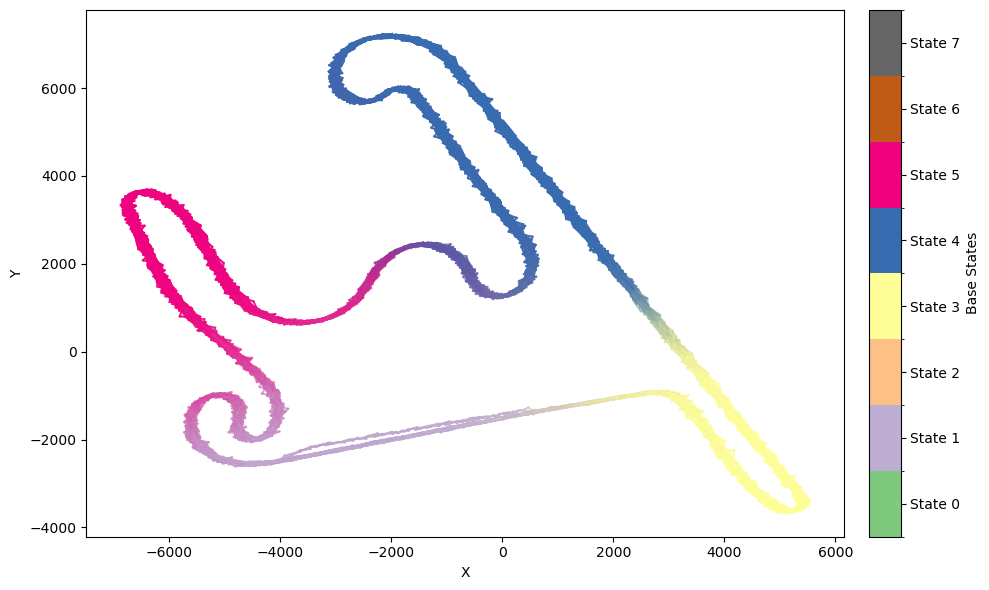

In [ ]:
plot_soft_trajectory(torch.mean(zs, dim=0).detach().cpu().numpy(),
                inferred_track)

### rSLDS Train

In [22]:
import ssm
from ssm.extensions.mp_srslds.transitions_ext import StickyRecurrentOnlyTransitions, StickyRecurrentTransitions
sro_trans=StickyRecurrentOnlyTransitions(K=K,D=D) 
rslds = ssm.SLDS(N=10, K=K, D=D,
             transitions=sro_trans,
             dynamics="diagonal_gaussian",
             emissions="gaussian",
             single_subspace=True)
rslds.initialize(ys_train)
q_elbos_lem, q_lem = rslds.fit(ys_train, method="laplace_em", 
                               variational_posterior="structured_meanfield",
                               initialize=False, num_iters=100, alpha=0.0)

ELBO: 669605.1: 100%|██████████| 100/100 [06:25<00:00,  3.86s/it]


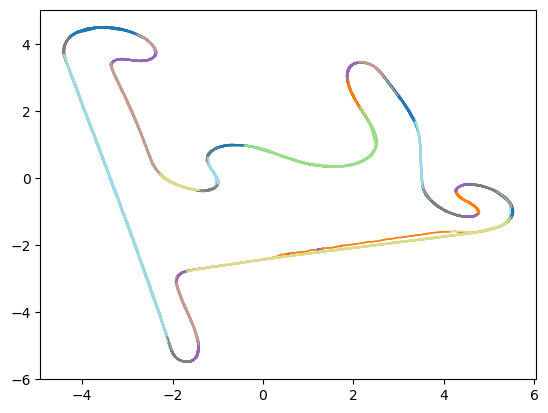

In [23]:
q_lem_x = q_lem.mean_continuous_states[0]
q_lem_z = rslds.most_likely_states(q_lem_x, ys_train)
plot_trajectory(q_lem_z, q_lem_x)

In [24]:
inferred_track1 = align_trajectory_affine(q_lem_x,
                                         pos_winner[['X','Y']].to_numpy())

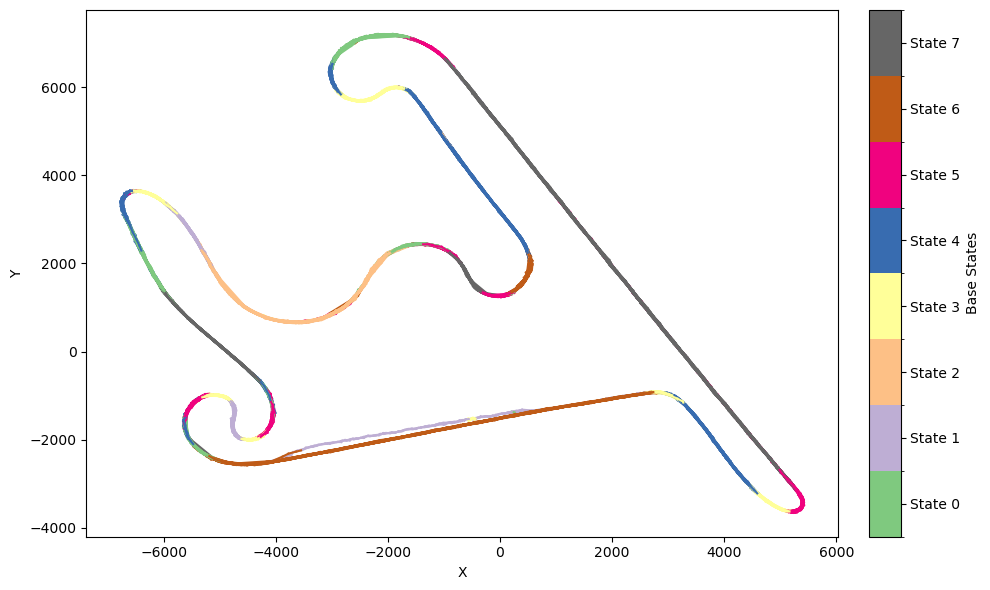

In [ ]:
plot_soft_trajectory(np.eye(8)[q_lem_z], inferred_track1)

In [10]:
def slds_k_step_ahead(model, q_lem_z, q_lem_x, ys, k):
    T, N = ys.shape
    D, K = model.D, model.K
    y_preds = np.zeros((T, k, N))
    z_t = q_lem_z.copy()
    C = model.emissions.Cs[0]  # [N, D]
    d = model.emissions.ds[0]  # [N]
    for j in range(k):
        if j == 0:
            x_t = q_lem_x.copy()
        else:
            # Predict next x_t x_{t+1} = A @ x_t + b
            A = np.stack([model.dynamics.As[z] for z in z_t[j:]])  # [T, D, D]
            b = np.stack([model.dynamics.bs[z] for z in z_t[j:]])  # [T, D]
            x_t[j:] = np.einsum('tid,td->ti', A, x_t[j-1:-1]) + b  # [T, D]
        # Predict y_t
        y_preds[:, j, :] = x_t @ C.T + d  # [T, N] 
        input_dummy = np.zeros((T, model.M))  # [T-1, M]
        xmask_dummy = np.ones((T, D), dtype=bool)  # [T-1, D]
        # Compute transition probabilities
        log_Ps = model.transitions.log_transition_matrices(
            x_t, input=input_dummy, mask=xmask_dummy, tag=None)  # [T-1, K, K]
        Ps = np.exp(log_Ps)  
        # Greedy update of z_t
        z_prev = z_t[:-1]
        z_next = np.argmax(Ps[np.arange(T - 1), z_prev], axis=-1)  # [T-1]
        z_t[1:] = z_next
    return y_preds, z_t, x_t  # shape [T, k, N]

In [11]:
pred_ys0 = rslds.smooth(q_lem_x, ys_train)
y_preds, z_preds, x_preds = slds_k_step_ahead(rslds, q_lem_z, q_lem_x, ys_train, k=10)
print("Train accuracy:", train_metrics(ys_train, pred_ys0, y_preds, k_max=10))

Train accuracy: [0.9993802357054289, 0.9993802029238728, 0.9990130181877614, 0.9983447738968808, 0.9972723383750758, 0.9956507568901214, 0.9932960954677028, 0.9899878655200378, 0.9855831606134717, 0.9798362184333168, 0.9725626011047707]


In [12]:
pos_alt= generate_full_laps(session_event.laps.pick_driver('HAM'), 'HAM')
states_test, zs_test = one_hot_states_multilap(pos_alt[['X','Y']].to_numpy(), circuit_info.corners[['X','Y']].to_numpy(), 
                                               pos_alt['LapNumber'].to_numpy())
### Observations
track_norm = scaler.transform(pos_alt[['X','Y']].to_numpy())
ys_test = (C @ track_norm.T).T + npr.randn(track_norm.shape[0], 10)*0.01
elbos, q_lem2 = rslds.approximate_posterior(ys_test,
                                              method="laplace_em",
                                              variational_posterior="structured_meanfield",
                                              num_iters=50)

/opt/conda/lib/python3.10/site-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
ELBO: 365745.9: 100%|██████████| 50/50 [01:12<00:00,  1.44s/it]


In [13]:
q_lem_x2 = q_lem2.mean_continuous_states[0]
q_lem_z2 = rslds.most_likely_states(q_lem_x2, ys_test)
pred_ys2=rslds.smooth(q_lem_x2, ys_test)
print("Test accuracy:", train_metrics(ys_test, pred_ys2, None, k_max=0))

Test accuracy: [0.9993821951035654]


In [15]:
### State quality
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
Z_train = np.eye(8)[q_lem_z]
Y_train = np.array(zs_train)
Z_test = np.eye(8)[q_lem_z2]
Y_test = np.array(zs_test)
# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
knn.fit(Z_train, Y_train)
acc = knn.score(Z_test, Y_test)
print("Test accuracy:", acc)

Test accuracy: 0.4199721103191819


### SLDS

In [27]:
import ssm
rslds = ssm.SLDS(N=10, K=K, D=D,
             transitions="sticky",
             dynamics="diagonal_gaussian",
             emissions="gaussian",
             single_subspace=True)
rslds.initialize(ys_train)
q_elbos_lem, q_lem = rslds.fit(ys_train, method="laplace_em", 
                               variational_posterior="structured_meanfield",
                               initialize=False, num_iters=100, alpha=0.0)

ELBO: 669896.2: 100%|██████████| 100/100 [02:45<00:00,  1.65s/it]


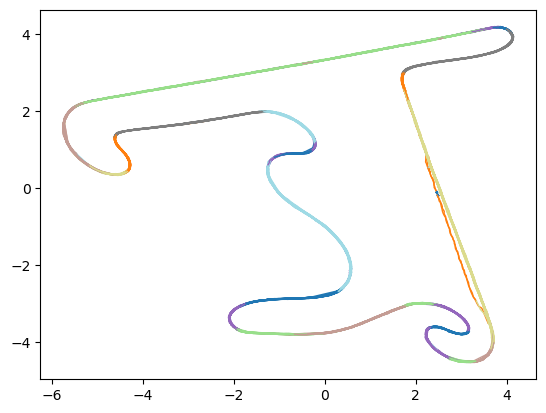

In [28]:
q_lem_x = q_lem.mean_continuous_states[0]
q_lem_z = rslds.most_likely_states(q_lem_x, ys_train)
plot_trajectory(q_lem_z, q_lem_x)